In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [3]:
workpath = "/home/tim/git/ms-thesis/code/ip_graph/out"
file_name = "{}curve.csv".format(workpath)

df = pd.read_csv(file_name, header=0, names=['x', 'y'])

pts = df[['x', 'y']].values
num_pts = pts.shape[0]

plt.plot(pts[:, 0], pts[:, 1])

FileNotFoundError: [Errno 2] No such file or directory: '/home/tim/git/ms-thesis/code/ip_graph/outcurve.csv'

In [5]:
pts.shape
trueground = pts

In [6]:
eps = 0.6
noise = eps * np.random.randn(trueground.shape[0], trueground.shape[1])
data = noise + trueground

def plot2d(pts, label = ''):
    plt.plot(pts[:, 0], pts[:, 1], label=label)

# plot2d(data)
# plot2d(trueground)

(100, 2)
(99, 2) (99,)


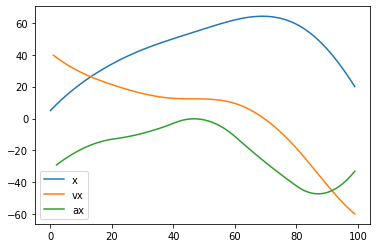

In [7]:
# kalman filter implementation
dt = 0.05
trueground_v = (trueground[1:, :] - trueground[:-1, :]) / dt
trueground_a = (trueground_v[1:, :] - trueground_v[:-1, :]) / dt
# trueground_a = (trueground_v[:, 1:] - trueground_v[:, :-1]) / dt
print(trueground.shape)
print(trueground_v.shape, trueground_v[:, 0].shape)
plt.plot(range(trueground.shape[0]), trueground[:,0], label = 'x')
plt.plot(range(1, trueground.shape[0]), trueground_v[:,0], label = 'vx')
plt.plot(range(2, trueground.shape[0]), trueground_a[:,0], label = 'ax')
plt.legend()

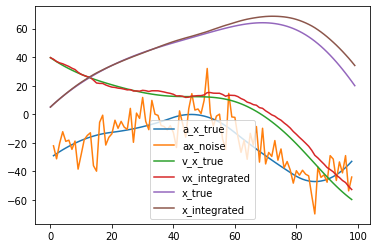

In [51]:
# def transition_v(acc, v0):
#     v = v0 + dt * acc
#     return v

eps = 10
noise = eps * np.random.randn(trueground_a.shape[0], trueground_a.shape[1])
a_measured = noise + trueground_a
xa = range(trueground_a.shape[0])

v = [trueground_v[0]]

acc = a_measured

for i in range(len(a_measured)):
    v.append(v[-1] + dt * acc[i])

vx_integrated = np.array(v)
x = [trueground[0]]
for i in range(len(vx_integrated)):
    x.append(x[-1] + dt * vx_integrated[i])

x_integrated = np.array(x)

plt.plot(xv[1:], trueground_a[:,0], label = 'a_x_true')
plt.plot(xv[1:], acc[:,0], label = 'ax_noise')

xv = range(trueground_v.shape[0])
plt.plot(xv, trueground_v[:,0], label = 'v_x_true')
plt.plot(xv, vx_integrated[:,0], label = 'vx_integrated')

xx = range(trueground.shape[0])
plt.plot(xx, trueground[:,0], label = 'x_true')
plt.plot(xx, x_integrated[:,0], label = 'x_integrated')
plt.legend()
# from acceleration only we dod't know integration constant, we have to consider v0 = v0 ground truth. or estimate it from later data. 

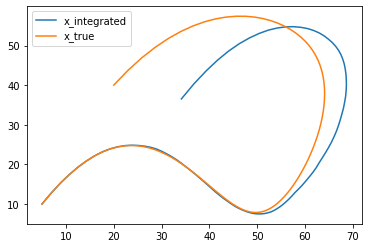

In [52]:
plot2d(x_integrated, label = 'x_integrated')
plot2d(trueground, label = 'x_true')
plt.legend()

In [ ]:
# add rssi points and measurements